In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\hafid\OneDrive\Desktop\KMDF-GPDriver\Script\[new]registryCSV\registries.csv')

In [5]:
df

,ProcessId,ProcessName,ProcessAgeSeconds,ProcessImageEntropy,SessionId,IsElevated,FirstSeenTime,LastSeenTime,OperationDurationSec,ProcessCreateTime,...,TimingVariance,RemoteOperationCount,FileExtensionModificationCount,SecuritySettingModificationCount,WritesToReadsRatio,RegistryKeyDepthMax,RegistryValueEntropyAvg,ComRegistryModifications,CriticalSystemKeyModifications,IS_MALWARE
0,864,\Device\HarddiskVolume3\Windows\System32\servi...,71,258,0,1,1747937576,1747937648,71,1747937576,...,0,0,0,0,0,9,320,0,0,0
1,4824,\Device\HarddiskVolume3\Windows\System32\taskh...,66,276,0,1,1747937576,1747937648,71,1747937576,...,0,0,0,0,0,12,0,0,0,0
2,3316,\Device\HarddiskVolume3\Windows\System32\svcho...,65,281,0,1,1747937577,1747937648,71,1747937577,...,0,0,0,0,6,10,163,0,0,0
3,4852,\Device\HarddiskVolume3\Windows\System32\Taskm...,70,290,0,1,1747937577,1747937648,70,1747937577,...,0,0,0,0,0,12,0,0,0,0
4,884,\Device\HarddiskVolume3\Windows\System32\lsass...,68,255,0,1,1747937579,1747937648,68,1747937579,...,0,0,0,0,3,9,398,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198760,10968,\Device\HarddiskVolume3\Users\wineleven\Docume...,0,288,0,1,1747937669,1747937669,0,1747937669,...,0,0,0,0,0,9,0,0,0,0
198761,11052,\Device\HarddiskVolume3\Windows\System32\VBoxS...,0,266,0,1,1747937672,1747937672,0,1747937672,...,0,0,0,0,0,9,0,0,0,0
198762,11080,\Device\HarddiskVolume3\Windows\System32\conho...,0,281,0,1,1747937672,1747937672,0,1747937672,...,0,0,0,0,0,9,0,0,0,0
198763,8572,\Device\HarddiskVolume3\Windows\System32\cmd.exe,0,235,0,1,1747937672,1747937672,0,1747937672,...,0,0,0,0,0,9,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198765 entries, 0 to 198764
Data columns (total 39 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   ProcessId                         198765 non-null  int64 
 1   ProcessName                       198026 non-null  object
 2   ProcessAgeSeconds                 198765 non-null  int64 
 3   ProcessImageEntropy               198765 non-null  int64 
 4   SessionId                         198765 non-null  int64 
 5   IsElevated                        198765 non-null  int64 
 6   FirstSeenTime                     198765 non-null  int64 
 7   LastSeenTime                      198765 non-null  int64 
 8   OperationDurationSec              198765 non-null  int64 
 9   ProcessCreateTime                 198765 non-null  int64 
 10  TotalOperationCount               198765 non-null  int64 
 11  CreateOperationCount              198765 non-null  int64 
 12  Mo

In [7]:
df = df.drop(columns=['ProcessName', 'ProcessId'])


In [8]:
df = df.loc[:, df.nunique() > 1]


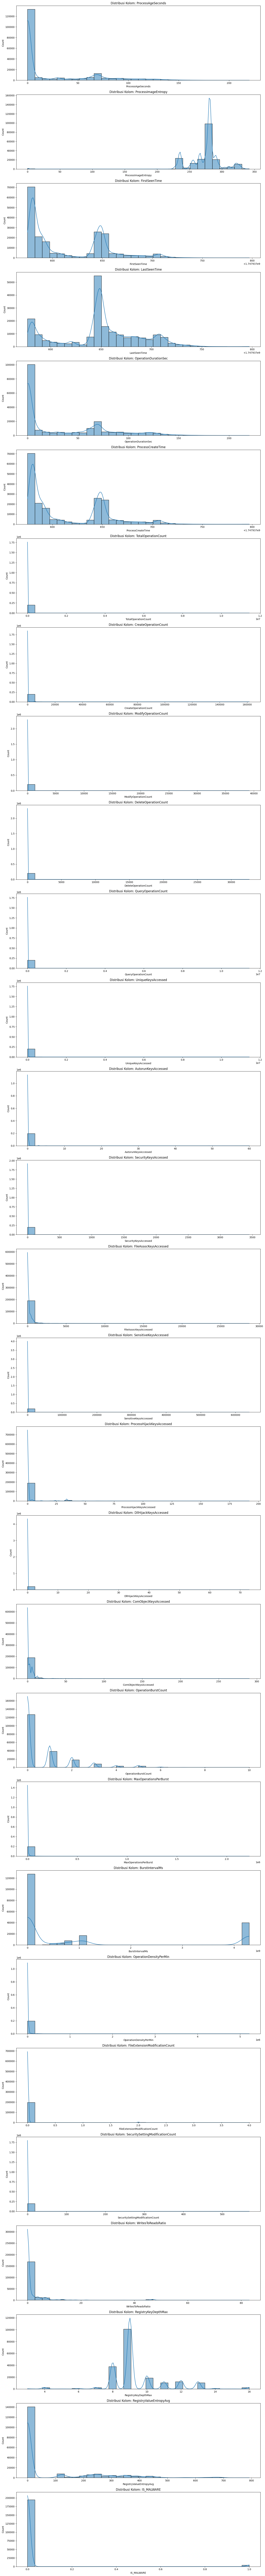

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5 * len(df.columns)))

for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(len(df.columns), 1, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi Kolom: {col}')

plt.tight_layout()
plt.show()

In [10]:
unique_counts = df.nunique()
print(unique_counts)

ProcessAgeSeconds                     192
ProcessImageEntropy                    77
FirstSeenTime                         186
LastSeenTime                          203
OperationDurationSec                  200
ProcessCreateTime                     186
TotalOperationCount                  7081
CreateOperationCount                  927
ModifyOperationCount                  229
DeleteOperationCount                  130
QueryOperationCount                  7045
UniqueKeysAccessed                   7060
AutorunKeysAccessed                    17
SecurityKeysAccessed                   56
FileAssocKeysAccessed                2451
SensitiveKeysAccessed                 565
ProcessHijackKeysAccessed              48
DllHijackKeysAccessed                   4
ComObjectKeysAccessed                 125
OperationBurstCount                    11
MaxOperationsPerBurst                9920
BurstIntervalMs                     28670
OperationDensityPerMin               5017
FileExtensionModificationCount    

In [11]:
print(df['OperationBurstCount'].value_counts())


OperationBurstCount
0     126898
1      38714
2      17932
3       8101
5       3242
4       3133
6        612
7         63
8         57
9         10
10         3
Name: count, dtype: int64


In [12]:
df = df.drop(columns=['FileExtensionModificationCount', 'SecuritySettingModificationCount', 'AutorunKeysAccessed', 'FirstSeenTime', 'LastSeenTime', 'ProcessCreateTime'], errors='ignore')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198765 entries, 0 to 198764
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   ProcessAgeSeconds          198765 non-null  int64
 1   ProcessImageEntropy        198765 non-null  int64
 2   OperationDurationSec       198765 non-null  int64
 3   TotalOperationCount        198765 non-null  int64
 4   CreateOperationCount       198765 non-null  int64
 5   ModifyOperationCount       198765 non-null  int64
 6   DeleteOperationCount       198765 non-null  int64
 7   QueryOperationCount        198765 non-null  int64
 8   UniqueKeysAccessed         198765 non-null  int64
 9   SecurityKeysAccessed       198765 non-null  int64
 10  FileAssocKeysAccessed      198765 non-null  int64
 11  SensitiveKeysAccessed      198765 non-null  int64
 12  ProcessHijackKeysAccessed  198765 non-null  int64
 13  DllHijackKeysAccessed      198765 non-null  int64
 14  ComO

In [14]:
average_by_malware = df.groupby('IS_MALWARE').mean(numeric_only=True)
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)
average_by_malware


#RegistryKeyDepthMax, ComObjectKeysAccessed, CreateOperationCount

,ProcessAgeSeconds,ProcessImageEntropy,OperationDurationSec,TotalOperationCount,CreateOperationCount,ModifyOperationCount,DeleteOperationCount,QueryOperationCount,UniqueKeysAccessed,SecurityKeysAccessed,FileAssocKeysAccessed,SensitiveKeysAccessed,ProcessHijackKeysAccessed,DllHijackKeysAccessed,ComObjectKeysAccessed,OperationBurstCount,MaxOperationsPerBurst,BurstIntervalMs,OperationDensityPerMin,WritesToReadsRatio,RegistryKeyDepthMax,RegistryValueEntropyAvg
IS_MALWARE,,,,,,,,,,,,,,,,,,,,,,
0,22.927899,273.831612,34.042364,1712.52249,121.528550,4.081537,0.621424,1586.290979,1706.458756,1.909618,216.562593,30.647646,1.554283,0.003988,2.819277,0.659435,4390.050716,9.854093e+08,5805.850854,1.728145,9.389122,86.349579
1,22.382725,325.309234,54.556669,264307.63183,2500.302553,611.482462,505.478168,260690.368647,264304.758292,2.642090,640.039131,6212.251491,5.348604,0.000000,5.000000,0.955142,4261.474350,1.800800e+09,182735.486757,2.262229,10.101646,135.492245


In [15]:
df = df.drop(columns=['RegistryKeyDepthMax', 'ComObjectKeysAccessed', 'CreateOperationCount'], errors='ignore')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198765 entries, 0 to 198764
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   ProcessAgeSeconds          198765 non-null  int64
 1   ProcessImageEntropy        198765 non-null  int64
 2   OperationDurationSec       198765 non-null  int64
 3   TotalOperationCount        198765 non-null  int64
 4   ModifyOperationCount       198765 non-null  int64
 5   DeleteOperationCount       198765 non-null  int64
 6   QueryOperationCount        198765 non-null  int64
 7   UniqueKeysAccessed         198765 non-null  int64
 8   SecurityKeysAccessed       198765 non-null  int64
 9   FileAssocKeysAccessed      198765 non-null  int64
 10  SensitiveKeysAccessed      198765 non-null  int64
 11  ProcessHijackKeysAccessed  198765 non-null  int64
 12  DllHijackKeysAccessed      198765 non-null  int64
 13  OperationBurstCount        198765 non-null  int64
 14  MaxO

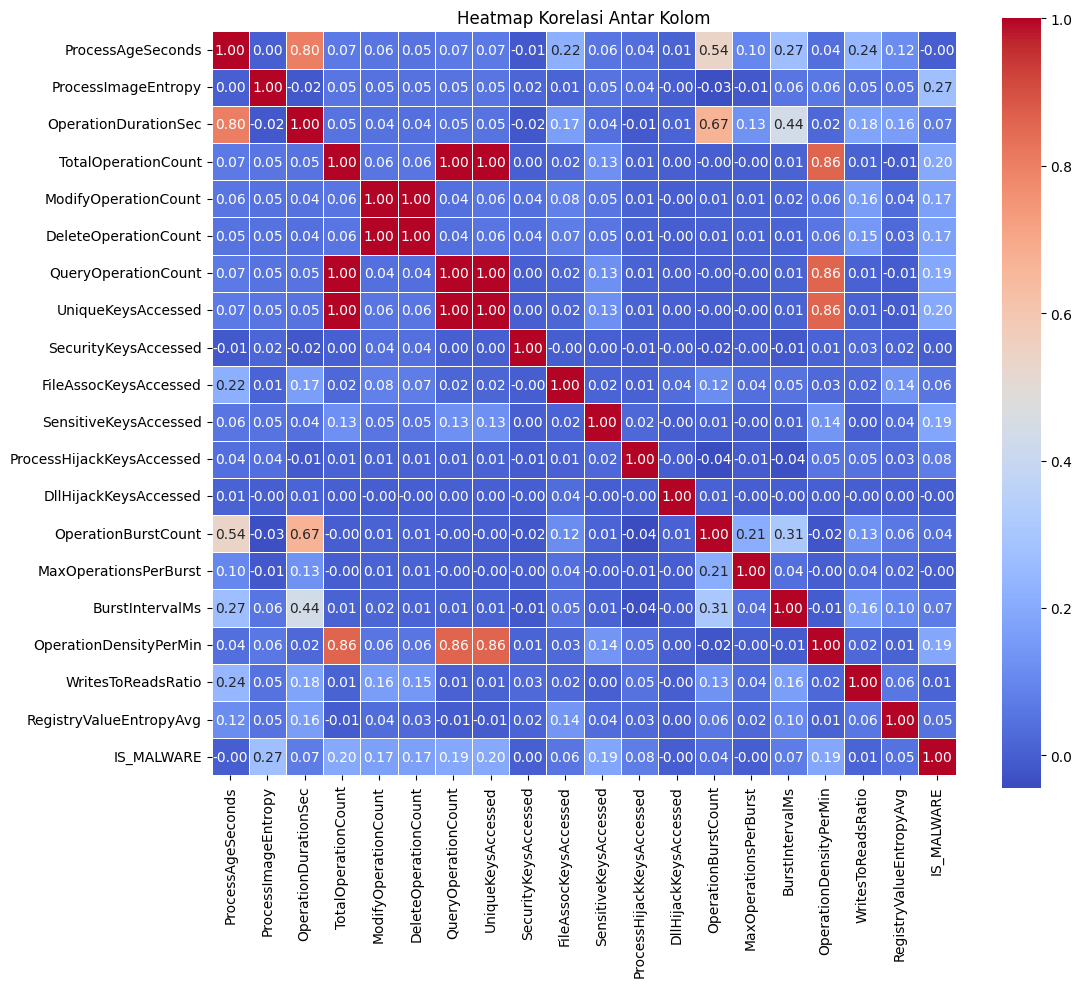

In [17]:
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

#OperationBurstCount, QueryOperationCount, FileAssocKeysAccessed, TotalOperationCount

In [18]:
df = df.drop(columns=['OperationBurstCount', 'QueryOperationCount', 'FileAssocKeysAccessed', 'TotalOperationCount'], errors='ignore')


In [19]:
correlation_with_target = df.corr()['IS_MALWARE'].drop('IS_MALWARE')

correlation_with_target = correlation_with_target.reindex(correlation_with_target.abs().sort_values(ascending=False).index)

print(correlation_with_target)


ProcessImageEntropy          0.270476
UniqueKeysAccessed           0.196028
OperationDensityPerMin       0.189456
SensitiveKeysAccessed        0.187604
DeleteOperationCount         0.170764
ModifyOperationCount         0.170594
ProcessHijackKeysAccessed    0.076259
BurstIntervalMs              0.069662
OperationDurationSec         0.069619
RegistryValueEntropyAvg      0.045876
WritesToReadsRatio           0.012374
ProcessAgeSeconds           -0.002049
SecurityKeysAccessed         0.001957
DllHijackKeysAccessed       -0.001117
MaxOperationsPerBurst       -0.000431
Name: IS_MALWARE, dtype: float64


In [23]:
!pip install imbalanced-learn xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)
Using cached sklea

# TUNING

In [24]:
selected_features = ['ProcessImageEntropy', 'SensitiveKeysAccessed', 'DeleteOperationCount']
X = df[selected_features]
y = df['IS_MALWARE']


In [25]:
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
xgb = XGBClassifier(scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
                    use_label_encoder=False, eval_metric='logloss', random_state=42)

In [26]:
print("Without SMOTE (with Scaling)")

for name, model in [('RandomForest', rf), ('XGBoost', xgb)]:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    scores = cross_validate(pipeline, X, y, scoring=scoring, cv=skf)
    print(f"\nModel: {name}")
    print(f"Precision: {np.mean(scores['test_precision']):.3f}")
    print(f"Recall:    {np.mean(scores['test_recall']):.3f}")
    print(f"F1-score:  {np.mean(scores['test_f1']):.3f}")

Without SMOTE (with Scaling)

Model: RandomForest
Precision: 0.370
Recall:    0.998
F1-score:  0.540


C:\Users\hafid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:02:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hafid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:02:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hafid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:02:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hafid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:02:24] WARNING: C:\actio


Model: XGBoost
Precision: 0.370
Recall:    0.998
F1-score:  0.540


In [27]:
print("With SMOTE + Scaling")

for name, model in [('RandomForest', rf), ('XGBoost', xgb)]:
    smote_pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    scores = cross_validate(smote_pipeline, X, y, scoring=scoring, cv=skf)
    print(f"\nModel: {name} + SMOTE + Scaling")
    print(f"Precision: {np.mean(scores['test_precision']):.3f}")
    print(f"Recall:    {np.mean(scores['test_recall']):.3f}")
    print(f"F1-score:  {np.mean(scores['test_f1']):.3f}")

With SMOTE + Scaling

Model: RandomForest + SMOTE + Scaling
Precision: 0.369
Recall:    0.998
F1-score:  0.539


C:\Users\hafid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:03:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hafid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:03:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hafid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:03:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hafid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:03:19] WARNING: C:\actio


Model: XGBoost + SMOTE + Scaling
Precision: 0.291
Recall:    0.999
F1-score:  0.450


In [28]:
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(
        scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
    ))
])

In [29]:
param_grid = {
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'clf__max_depth': [3, 5, 7, 9],
    'clf__n_estimators': [50, 100, 150, 200],

}


In [30]:
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(pipeline, param_grid, scoring='recall', cv=skf, n_jobs=-1)
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
#print("Best F1 (default threshold 0.5):", grid.best_score_)
print("Best recall (default threshold 0.5):", grid.best_score_)

C:\Users\hafid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:05:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'clf__learning_rate': 0.01, 'clf__max_depth': 9, 'clf__n_estimators': 50}
Best recall (default threshold 0.5): 0.997852313101459


In [31]:
import numpy as np
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)
best_params = grid.best_params_

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(
        scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **best_params
    ))
])

thresholds = np.arange(0.1, 1.0, 0.005)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    precisions = []
    recalls = []
    f1s = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        pipeline.fit(X_train, y_train)
        probs = pipeline.predict_proba(X_test)[:, 1]
        preds = (probs >= threshold).astype(int)

        precision = precision_score(y_test, preds, zero_division=0)
        recall = recall_score(y_test, preds, zero_division=0)
        f1 = f1_score(y_test, preds, zero_division=0)

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1s)

    print(f"Threshold {threshold:.3f} → Precision: {avg_precision:.3f}, Recall: {avg_recall:.3f}, F1: {avg_f1:.3f}")

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold:.3f} with F1: {best_f1:.3f}")



Threshold 0.100 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.105 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.110 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.115 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.120 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.125 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.130 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.135 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.140 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.145 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.150 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.155 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.160 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.165 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.170 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.175 → Precision: 0.369, Recall: 0.998, F1: 0.539
Threshold 0.180 → Precis

# FINAL MODEL

In [32]:
selected_features = ['ProcessImageEntropy', 'SensitiveKeysAccessed', 'DeleteOperationCount']
X = df[selected_features]
y = df['IS_MALWARE']


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(
        scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **best_params
    ))
])

threshold = 0.825
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

precisions, recalls, f1s = [], [], []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    probs = pipeline.predict_proba(X_test)[:, 1]
    preds = (probs >= threshold).astype(int)

    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))
    f1s.append(f1_score(y_test, preds))

print(f"Evaluasi dengan best params dan threshold {threshold} (tanpa SMOTE)")
print(f"Precision: {np.mean(precisions):.3f}")
print(f"Recall:    {np.mean(recalls):.3f}")
print(f"F1-score:  {np.mean(f1s):.3f}")

Evaluasi dengan best params dan threshold 0.825 (tanpa SMOTE)
Precision: 0.663
Recall:    0.930
F1-score:  0.774
